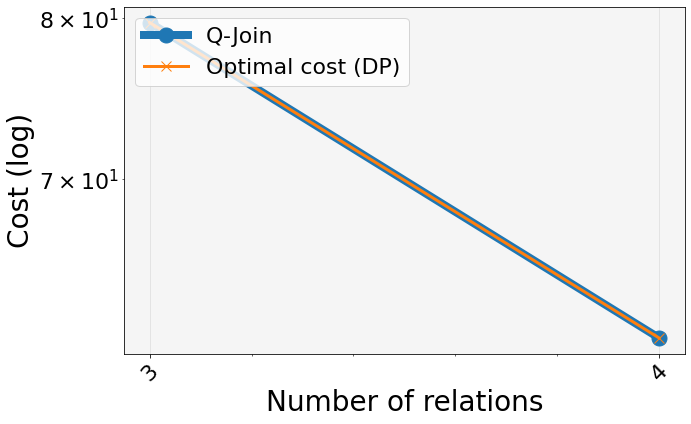

In [1]:
import json
import os
import matplotlib.pyplot as plt

method_name = "precise" 
solver_name = "exact_poly_solver" # "exact_poly_solver"
query_graphs = ["clique", "cycle", "star", "tree", "chain"]
query_graph = query_graphs[0]
data_files = "..//results//" + method_name + "//" + solver_name + "//"

# Load all the json files from the folder
data = {}
for filename in os.listdir(data_files):
    if filename.endswith(".json") and query_graph in filename:  # Check if the file is a JSON file
        file_path = os.path.join(data_files, filename)
        with open(file_path, 'r') as f:
            # Load the JSON data
            file_data = json.load(f)
            
            # Combine the data, handling conflicts by overriding existing keys
            for key, value in file_data.items():
                data[key] = value
                    
                    
# Extract the relevant information
labels = []
costs = []
optimal_costs = []

for key, value in data.items():
    # Append number of nodes to the labels
    labels.append(key.split()[2])
    costs.append(value['cost'])
    optimal_costs.append(value['optimal_cost'])

# Plotting the data
plt.figure(figsize=(6*1.618033988749895, 6))
x = range(len(labels))
plt.plot(x, costs, label='Q-Join', marker='o', markersize=15, linewidth=8, linestyle='solid')
plt.plot(x, optimal_costs, label='Optimal cost (DP)', marker='x', markersize=10, linewidth=3, linestyle='solid')

# Adding minor ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=22)

#plt.xticks(range(len(energy_levels)))

plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Adding a background color to the plot for better contrast
ax = plt.gca()
ax.set_facecolor('whitesmoke')

plt.xticks(x, labels, rotation=45) #, ha='right')
plt.xlabel('Number of relations', fontsize=28)
plt.ylabel('Cost (log)', fontsize=28)
plt.yscale('log')
plt.grid(True)
#plt.title('Q-Join vs Optimal Cost for Different Graphs')
plt.legend(fontsize=22, loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()